In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\JupyterDemo\kc_house_data.csv")# king county house price dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


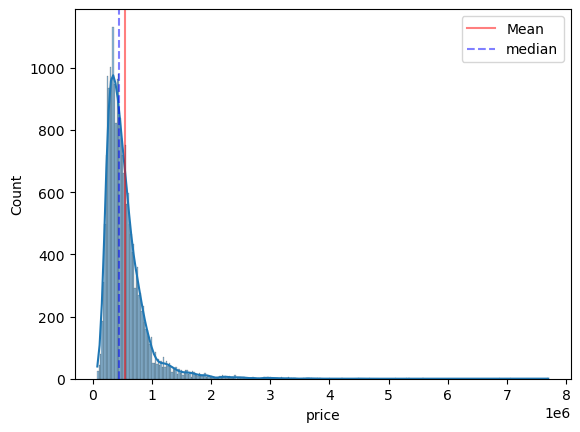

In [3]:
# draw histrogram plot for checking skewness of data 

sns.histplot(data =df['price'],kde =True)
plt.axvline(x=df.price.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=df.price.median(),color ='blue',ls='--',alpha=0.5,label = 'median')
plt.legend()

- ### Data transformation is the process of taking a mathematical function and applying it to the data.

### Log Transformation

- Each variable x is replaced with,where the base of the log is left up to the analyst.It is considered common to use base 10,
  base 2 and natural log in.
- The log transformation can be used to make highly skewed distributions less skewed.
- This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of 
  inferential statistics.

In [21]:
#create Log-transformation data
df['price_log']=np.log(df['price'])
#print(df['price'],"\t ",df['price_log'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64 	  0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: price_log, Length: 21613, dtype: float64


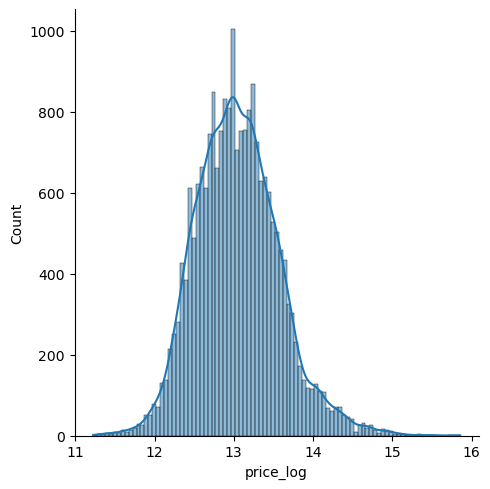

In [12]:
sns.displot(df['price_log'],kde = True)
#plt.axvline(x=df.price_log.mean(),color='red',alpha=0.5,label='Mean')
#plt.axvline(x=df.price_log.median(),color='blue',ls='--',alpha=0.5,label='Median')
#plt.legend()

### Square root transformation
- Normalizing a skewed distribution.
- Transformaing a non-linear relationship between 2 variables into linear one
- Reducing heteroscedasticity(विषमता) of the residuals(अवशेष) in linear regression.
- Focusing on visualizing certain parts of your data.
- When you apply a square root transformation to variable,high values get compressed and low values become more spread out.
  Log transformation does the same thing but more aggressively.

In [19]:
#Creating square root transfomation
df['price_sqrt']=np.sqrt(df['price'])
#print(df['price'],"\t ",df['price_sqrt'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64 	  0        471.062629
1        733.484833
2        424.264069
3        777.174369
4        714.142843
            ...    
21608    600.000000
21609    632.455532
21610    634.114343
21611    632.455532
21612    570.087713
Name: price_sqrt, Length: 21613, dtype: float64


C:\Users\Sairam\AppData\Local\Temp\ipykernel_8872\50723676.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_sqrt'])


<Axes: xlabel='price_sqrt', ylabel='Density'>

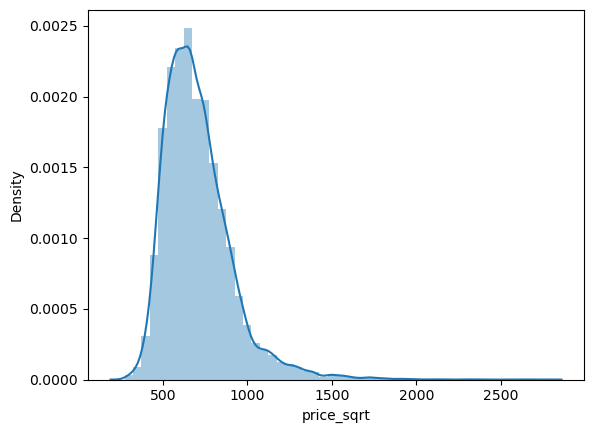

In [16]:
sns.distplot(df['price_sqrt'])

### Suggestion
- If data is left skewed then we have to be careful because it may increase the skewness.

### Power Transformation
- A power transformation is family of function applied to create a monotonic transformation of data using power functions.
- it is data transformation technique used to stablize variance,make the data more normaldistribution,like,impore the 
  validity of measures of association(such as the Pearson correlation between variables ),and for other data stabilization procedures.

In [26]:
from scipy.stats import boxcox

#Box-Cox transformation in python
#df.insert(len(df.columns),'A_Boxcox',boxcox(df.iloc[:,2])[0])

#df['A_Boxcox']

C:\Users\Sairam\AppData\Local\Temp\ipykernel_8872\1811342577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['A_Boxcox'])


<Axes: xlabel='A_Boxcox', ylabel='Density'>

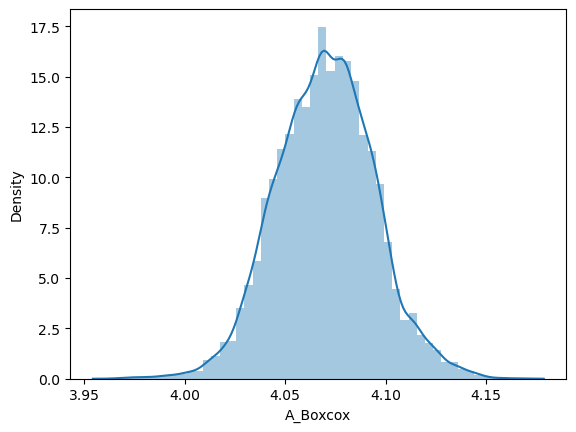

In [27]:
sns.distplot(df['A_Boxcox'])